# ch 17_5. multiclass classification

이전 챕터에서 logistic regression을 이용한 이진 분류 모델에 대해서 알아보았습니다. 이는 기본적으로 linear model을 통해서 얻은 값에 sigmoid를 취해주어 0과 1 사이 값으로 변환합니다. 그리고 0.5보다 크면 1, 작으면 0으로 분류합니다. 이를 수식과 그림으로 나타내면 아래와 같습니다.

$$g(z)=\frac{1}{1+e^{-z}}$$

$$H(X)=\frac{1}{1+e^{-(WX+b)}}$$

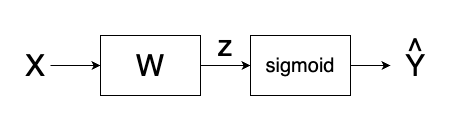

그런데 분류해야할 클래스가 여러개이면 어떻게 할까요? 가령 숫자에 대한 손글씨 이미지를 보고, 이 숫자가 0부터 9 사이 어떤 값인지 분류해야한다면 어떻게 할 수 있을까요? 이 때 사용할 수 있는 기법이 Softmax입니다.

## Multinomial Classification

분류해야하는 클래스가 3개일 때, 입력 값과 웨이트의 곱으로 각 클래스 별 확률을 계산하는 수식을 행렬 곱으로 표현하면 아래와 같습니다. 

$$\begin{pmatrix}
w_{A1}\;w_{A2}\;w_{A3} \\
w_{B1}\;w_{B2}\;w_{B3} \\
w_{C1}\;w_{C2}\;w_{C3}
\end{pmatrix} \cdot
\begin{pmatrix}
x_{1}\\
x_{2}\\
x_{3}
\end{pmatrix}=
\begin{pmatrix}
\hat{y_{A}}\\
\hat{y_{B}}\\
\hat{y_{C}}
\end{pmatrix}
$$

예측값을 하나만 출력해서 sigmoid를 거친 뒤, 0.5를 기준으로 라벨을 분류했었던 logistic regression과 달리, 이번에는 분해야하는 클래스 개수만큼 예측 값을 계산합니다. 그 결과 예를 들면 (2.0, 1.0, 0.1) 처럼 입력 데이터가 각 클래스에 속할 확률을 담은 벡터가 리턴될 것입니다. 

그런데 sigmoid 같은 함수를 적용하지 않았기 때문에, 각각의 값들이 0부터 1사이의 값들로 딱 떨어지지 않습니다. 예를 들어 (2.0, 1.0, 0.1) 보다는 (0.6590, 0.2424, 0.098) 이런 식으로 각 클래스에 속할 확률을 0과 1사이 수이고, 모두 더했을 때 1이 나오도록 보정해준다면 훨씬 편리하지 않을까요? 이 때 사용하는 것이 softmax 함수입니다.

## Softmax

$$Softmax(y_{i})=\frac{exp(y_{i})}{\sum_{j}exp(y_{j})}$$

softmax 함수를 살펴보면 각 클래스 별 예측값들의 지수승을 모든 클래스들에 대한 예측값들의 자연 지수승의 합으로 나눠준 값입니다. 즉, softmax를 취해준 다음 모든 클래스들의 예측값을 더해주면 1이 됩니다. 또한 각각의 예측값들의 범위는 0과 1 사이가 됩니다. 직접 결과를 한번 보겠습니다.

In [5]:
import torch
from torch.nn import Softmax

softmax = Softmax()
y_hat = torch.Tensor([2.0, 1.0, 0.1])

In [6]:
output = softmax(y_hat)

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_45690/1458715220.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = softmax(y_hat)


In [7]:
output

tensor([0.6590, 0.2424, 0.0986])

In [35]:
output

tensor([[0.6590, 0.2424, 0.0986]])

In [37]:
torch.argmax(output, dim=1)

tensor([0])

softmax를 적용한 모델의 구조를 그림으로 그려보면 아래와 같습니다. 행렬 곱을 통해서 각 클래스 별 확률을 곱해준 다음, sigmoid 대신 softmax를 취해주었습니다.

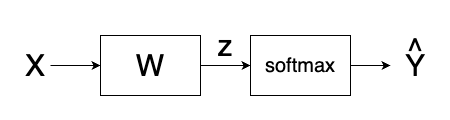

## Cross Entropy
모델의 형태가 결정되었으니, 이제 loss function을 디자인해야합니다. 앞서 logistic regression에서 사용했던 loss function은 분류해야할 클래스가 0 혹은 1, 두 개일 때에만 적용이 가능합니다. 분류해야할 클래스가 여러개인 상황에서는 Cross Entropy라는 함수를 사용해야합니다. 

cross entropy도 비슷합니다. 라벨에 해당하는 클래스에 대해선 예측값이 0일 때 loss를 크게 주고, 예측 값이 1일 때는 loss를 작게 주면 됩니다. 라벨에 해당하지 않는 클래스에 대해선 반대로 적용하면 됩니다. 하나의 입력 데이터에 대해서 cross entropy 수식을 적용하면 아래와 같습니다.

$$-\sum_{i}L_{i}log(s_{i})$$

i는 클래스의 번호를 말합니다. Li는 특정 클래스의 라벨을 말하고, si는 특정 클래스에 대한 예측값입니다. 예를들어 전체 클래스 수는 3개, 특정 입력 데이터에 대한 라벨은 2라고 가정해보겠습니다. 그러면 라벨은 아래와 같은 원 핫 벡터로 표현할 수 있습니다. 

$$L=(0, 1, 0)$$

모든 라벨에 대해서 cross entropy 수식을 풀어쓰면 아래와 같습니다.

$$0*-log(s_{0})+1*-log(s_{1})+0*-log(s_{2})$$

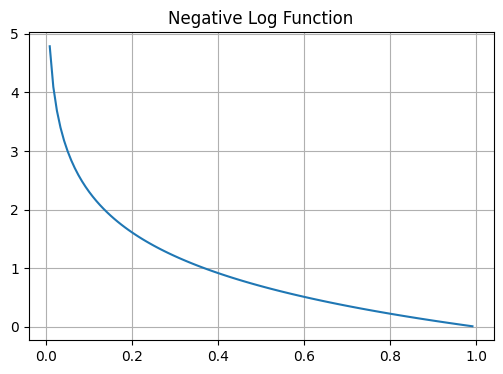

In [8]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(6, 4))
x = np.linspace(0, 1, 121)[1:-1]
y = -np.log(x)
plt.plot(x, y)
plt.title("Negative Log Function")
plt.grid()

여기서 라벨이 0인 첫번째와 세번째 행은 무시되고, 결국 라벨이 1일 때 예측값이 어디에 가까운지에 따라서 loss가 결정됩니다. 예측 값이 1에 가깝다면 loss는 0에 가까워지고, 0에 가깝다면 loss는 무한대에 가까워집니다.

In [10]:
from torch.nn import CrossEntropyLoss

cross_entropy_loss = CrossEntropyLoss()

앞서 softmax를 적용했던 output 값에 cross entropy를 이용하여 loss를 계산해보겠습니다. label이 1일 때와 3일 때 loss 값을 비교해보겠습니다.

In [16]:
output = output.unsqueeze(dim=0)

In [19]:
output

tensor([[0.6590, 0.2424, 0.0986]])

label이 0일 때 loss 계산

In [18]:
label = torch.Tensor([0]).type(torch.long)
cross_entropy_loss(output, label)

tensor(0.8021)

In [21]:
label = torch.Tensor([1]).type(torch.long)
cross_entropy_loss(output, label)

tensor(1.2187)

label이 2일 때 loss 계산

In [20]:
label = torch.Tensor([2]).type(torch.long)
cross_entropy_loss(output, label)

tensor(1.3626)

## torch를 이용한 multiclass classification 구현

이전 실습때 다뤘던 펭귄 데이터 셋을 이용해서 torch 스타일로 분류 모델을 한번 학습시켜보고, 정확도를 측정해보겠습니다.

### 데이터 셋 준비

In [23]:
import pandas as pd

df = pd.read_csv("./data/penguins_preprocessed.csv")
df

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,is_male
0,0,-0.897653,0.783487,-1.429521,-0.571229,0,0,1,1
1,0,-0.824290,0.121896,-1.072408,-0.509011,0,0,1,0
2,0,-0.677564,0.427246,-0.429605,-1.193405,0,0,1,0
3,0,-1.337831,1.088836,-0.572450,-0.944535,0,0,1,0
4,0,-0.860972,1.750427,-0.786718,-0.695664,0,0,1,1
...,...,...,...,...,...,...,...,...,...
329,2,0.587947,-1.761093,0.927425,0.890886,1,0,0,0
330,2,0.514584,-1.455743,0.998847,0.797560,1,0,0,0
331,2,1.174851,-0.743261,1.498806,1.917477,1,0,0,1
332,2,0.221132,-1.201285,0.784580,1.233083,1,0,0,0


In [24]:
from sklearn.model_selection import train_test_split

X = df.drop(["species"], axis=1)
y = df["species"]
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

### Convert to tensor

In [25]:
x_train = torch.Tensor(x_train.values)
y_train = torch.Tensor(y_train.values).type(torch.long)
x_val = torch.Tensor(x_val.values)
y_val = torch.Tensor(y_val.values).type(torch.long)

In [28]:
x_train.shape

torch.Size([267, 8])

In [29]:
y_train.shape

torch.Size([267])

### Multinomial Classifier 모델 생성

In [44]:
import torch

class SoftmaxClassification(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(SoftmaxClassification, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)
        self.softmax = torch.nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.linear(x)
        x = self.softmax(x)
        return x

In [45]:
model = SoftmaxClassification(input_dim=8, output_dim=3)

In [46]:
model.linear.weight

Parameter containing:
tensor([[ 0.0103,  0.0961,  0.0432, -0.3354,  0.3346,  0.0832,  0.1974,  0.0150],
        [ 0.0172, -0.2522, -0.0970, -0.2470,  0.1052,  0.0746, -0.0294, -0.2372],
        [-0.0754, -0.1049, -0.2769, -0.0634,  0.0752, -0.2265, -0.2688,  0.0664]],
       requires_grad=True)

### 하이퍼 파라미터 셋팅

In [47]:
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()
epochs = 100

### 모델 학습

In [48]:
from collections import defaultdict
from sklearn.metrics import accuracy_score

def train(model):
    logs = defaultdict(list)
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        outputs = model(x_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        pred = torch.argmax(outputs, dim=1) 
        acc = accuracy_score(y_train, pred)

        # validation step
        with torch.no_grad():
            val_outputs = model(x_val)
            val_loss = criterion(val_outputs, y_val)
            val_pred = torch.argmax(val_outputs, dim=1) 
            val_acc = accuracy_score(y_val, val_pred)

        logs["train_loss"].append(loss.item())
        logs["train_acc"].append(acc)
        logs["val_loss"].append(val_loss.item())
        logs["val_acc"].append(val_acc)

        if (epoch + 1) % 10 == 0:
            print(f"epoch: {epoch + 1} train - loss: {round(loss.item(), 4)} acc: {round(acc, 4)}"\
                  f" val - loss: {round(val_loss.item(), 4)} acc: {round(val_acc, 4)}")
    return logs

In [49]:
logs = train(model)

epoch: 10 train - loss: 0.9622 acc: 0.8015 val - loss: 0.9438 acc: 0.8657
epoch: 20 train - loss: 0.8639 acc: 0.809 val - loss: 0.8505 acc: 0.8507
epoch: 30 train - loss: 0.8058 acc: 0.8315 val - loss: 0.794 acc: 0.8806
epoch: 40 train - loss: 0.7686 acc: 0.8764 val - loss: 0.7568 acc: 0.9104
epoch: 50 train - loss: 0.742 acc: 0.9213 val - loss: 0.7297 acc: 0.9851
epoch: 60 train - loss: 0.7214 acc: 0.9588 val - loss: 0.7086 acc: 1.0
epoch: 70 train - loss: 0.7048 acc: 0.9663 val - loss: 0.6916 acc: 1.0
epoch: 80 train - loss: 0.6911 acc: 0.9663 val - loss: 0.6776 acc: 1.0
epoch: 90 train - loss: 0.6796 acc: 0.97 val - loss: 0.666 acc: 1.0
epoch: 100 train - loss: 0.67 acc: 0.9775 val - loss: 0.6563 acc: 1.0


### 결과 시각화

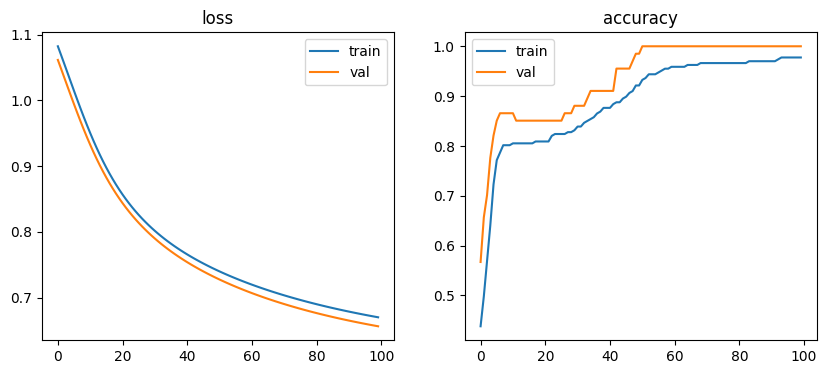

In [50]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(10, 4))

ax0 = fig.add_subplot(1, 2, 1)
ax1 = fig.add_subplot(1, 2, 2)
ax0.plot(logs["train_loss"], label="train")
ax0.plot(logs["val_loss"], label="val")
ax0.legend()
ax0.set_title("loss")

ax1.plot(logs["train_acc"], label="train")
ax1.plot(logs["val_acc"], label="val")
ax1.legend()
ax1.set_title("accuracy")
plt.legend()

## 정리

이번 챕터에서는 클래스가 3개 이상인 분류 모델을 학습하기 위해서 필요한 softmax와 cross entropy에 대해서 알아보았습니다. 사실 우리가 아는 대부분의 딥러닝 모델들은 이 softmax와 cross entropy를 기반으로 classification 테스크를 학습하는 모델들이기 때문에 이 두 개념을 잘 기억해두시기 바랍니다.